# Import librerie e oggetti
* **pandas** per la manipolazione dei dati in formato tabellare 
* **sklearn (Scikit-learn)** per l'utilizzo di algoritmi di apprendimento
    * *LabelEncoder*, strumento ausialiario per convertire i valori delle categorie in altri di tipo numerico.
    * *LogisticRegression*, classificatore che implementa una Regressione lineare regolarizzata
    * *DecisionTreeClassifier*, classificatore che implementa un albero di Albero di Decisione
    * *RandomForestClassifier*, classificatore che realizza una foresta di alberi di Decisione

* **matplotlib** per la visualizzazione dei dati
* **numpy** e **statistics** per il supporto ulteriore alla manipolazione dei dati
* **itertools** per il supporto alla manipolazione di strutture dati
* **<item.csv>** file csv contenente i dati di train/test

In [1]:
!sudo apt update && sudo apt install -y graphviz

/bin/sh: 1: sudo: Permission denied


In [2]:
!pip install seaborn
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import statistics

/home/mario/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [3]:
#importa i csv
dataframe_pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False,dtype=str)
dataframe_train = pd.read_csv('train.csv', error_bad_lines=False,dtype=str)
dataframe_test = pd.read_csv('test.csv', error_bad_lines=False,dtype=str)

# Pre-processing
Prima di effettuare l'addestramento del modello, lo si preparara.<br>
Tre operazioni eseguite in questo caso:
* **encoding** di alcuni campi del dataset
* **analisi dei dati** per cercare delle feature non significative
* **split** dei dati tra feature(X_...) e valore atteso(y_...)

In [4]:
#visualizza il dataset di train a grandi linee
dataframe_train

,Winner,First_pokemon,Second_pokemon
0,382,382,636
1,278,278,404
2,557,88,557
3,366,366,345
4,457,457,356
...,...,...,...
31995,51,51,54
31996,306,440,306
31997,63,22,63
31998,715,715,568


In [5]:
#verifica se ci sono dei valori nulli nelle colonne
dataframe_train.isnull().any()

Winner            False
First_pokemon     False
Second_pokemon    False
dtype: bool

In [6]:
#visualizza il dataset dei pokemon a grandi linee
dataframe_pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [7]:
#verifica se ci sono dei valori nulli nelle colonne
dataframe_pokemon.isnull().any()

#             False
Name           True
Type 1        False
Type 2         True
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool

In [8]:
#conta quante righe hanno il campo Type 2 nullo.
sum(pd.isnull(dataframe_pokemon['Type 2']))

386

In [9]:
#quasi il 50% dei pokemon non ha un secondo tipo
#sostituisci i campi nan con stringhe vuote
dataframe_pokemon = dataframe_pokemon.replace(np.nan, '', regex=True)

In [10]:
#effettua il merge dei dataframe avendo in un unico dataframe le informazioni dei pokemon
#il dataframe merged ha la seguente struttura 
# Winner 	First_pokemon 	Second_pokemon + INFO SUL PRIMO POKEMON + INFO SUL SECONDO POKEMON
merged = pd.merge(dataframe_train, dataframe_pokemon.rename(columns={'#':'First_pokemon'}), on='First_pokemon',  how='left')
merged = merged.rename(columns={'Name': 'First_pokemon_Name','Type 1': 'First_pokemon_Type_1', 'Type 2': 'First_pokemon_Type_2','HP': 'First_pokemon_HP', 'Attack': 'First_pokemon_Attack', 'Defense': 'First_pokemon_Defense', 'Sp. Atk': 'First_pokemon_Sp.Atk', 'Sp. Def': 'First_pokemon_Sp.Def', 'Speed': 'First_pokemon_Speed', 'Generation': 'First_pokemon_Generation', 'Legendary': 'First_pokemon_Legendary'})

merged = pd.merge(merged, dataframe_pokemon.rename(columns={'#':'Second_pokemon'}), on='Second_pokemon',  how='left')
merged = merged.rename(columns={'Name': 'Second_pokemon_Name','Type 1': 'Second_pokemon_Type_1', 'Type 2': 'Second_pokemon_Type_2','HP': 'Second_pokemon_HP', 'Attack': 'Second_pokemon_Attack', 'Defense': 'Second_pokemon_Defense', 'Sp. Atk': 'Second_pokemon_Sp.Atk', 'Sp. Def': 'Second_pokemon_Sp.Def', 'Speed': 'Second_pokemon_Speed', 'Generation': 'Second_pokemon_Generation', 'Legendary': 'Second_pokemon_Legendary'})

In [11]:
merged.head()

,Winner,First_pokemon,Second_pokemon,First_pokemon_Name,First_pokemon_Type_1,First_pokemon_Type_2,First_pokemon_HP,First_pokemon_Attack,First_pokemon_Defense,First_pokemon_Sp.Atk,...,Second_pokemon_Type_1,Second_pokemon_Type_2,Second_pokemon_HP,Second_pokemon_Attack,Second_pokemon_Defense,Second_pokemon_Sp.Atk,Second_pokemon_Sp.Def,Second_pokemon_Speed,Second_pokemon_Generation,Second_pokemon_Legendary
0,382,382,636,Feebas,Water,,20,15,20,10,...,Psychic,,45,30,50,55,65,45,5,False
1,278,278,404,Combusken,Fire,Fighting,60,85,60,85,...,Water,,55,84,105,114,75,52,3,False
2,557,88,557,Mega Slowbro,Water,Psychic,95,75,180,130,...,Grass,,75,75,95,75,95,113,5,False
3,366,366,345,Altaria,Dragon,Flying,75,70,90,70,...,Grass,Poison,50,60,45,100,80,65,3,False
4,457,457,356,Bastiodon,Rock,Steel,60,52,168,47,...,Fire,,70,85,140,85,70,20,3,False


In [12]:
#per facilitarmi l'analisi ho modificato il dataframe
#la colonna Winner contiene 1 se il vincitore è il primo pokemon, 0 altrimenti
def updateValue(row):
    if row['Winner'] == row['First_pokemon']:
        return 1
    else:
        return 0

merged['Winner'] = merged.apply(updateValue, axis=1)

In [13]:
merged.head()

,Winner,First_pokemon,Second_pokemon,First_pokemon_Name,First_pokemon_Type_1,First_pokemon_Type_2,First_pokemon_HP,First_pokemon_Attack,First_pokemon_Defense,First_pokemon_Sp.Atk,...,Second_pokemon_Type_1,Second_pokemon_Type_2,Second_pokemon_HP,Second_pokemon_Attack,Second_pokemon_Defense,Second_pokemon_Sp.Atk,Second_pokemon_Sp.Def,Second_pokemon_Speed,Second_pokemon_Generation,Second_pokemon_Legendary
0,1,382,636,Feebas,Water,,20,15,20,10,...,Psychic,,45,30,50,55,65,45,5,False
1,1,278,404,Combusken,Fire,Fighting,60,85,60,85,...,Water,,55,84,105,114,75,52,3,False
2,0,88,557,Mega Slowbro,Water,Psychic,95,75,180,130,...,Grass,,75,75,95,75,95,113,5,False
3,1,366,345,Altaria,Dragon,Flying,75,70,90,70,...,Grass,Poison,50,60,45,100,80,65,3,False
4,1,457,356,Bastiodon,Rock,Steel,60,52,168,47,...,Fire,,70,85,140,85,70,20,3,False


In [14]:
#elimina colonne relative ai nomi e a identificativi
colonneDaEliminare = ['First_pokemon', 'First_pokemon_Name','Second_pokemon','Second_pokemon_Name']
merged = merged.drop(colonneDaEliminare, axis=1)

In [15]:
merged.head()

,Winner,First_pokemon_Type_1,First_pokemon_Type_2,First_pokemon_HP,First_pokemon_Attack,First_pokemon_Defense,First_pokemon_Sp.Atk,First_pokemon_Sp.Def,First_pokemon_Speed,First_pokemon_Generation,...,Second_pokemon_Type_1,Second_pokemon_Type_2,Second_pokemon_HP,Second_pokemon_Attack,Second_pokemon_Defense,Second_pokemon_Sp.Atk,Second_pokemon_Sp.Def,Second_pokemon_Speed,Second_pokemon_Generation,Second_pokemon_Legendary
0,1,Water,,20,15,20,10,55,80,3,...,Psychic,,45,30,50,55,65,45,5,False
1,1,Fire,Fighting,60,85,60,85,60,55,3,...,Water,,55,84,105,114,75,52,3,False
2,0,Water,Psychic,95,75,180,130,80,30,1,...,Grass,,75,75,95,75,95,113,5,False
3,1,Dragon,Flying,75,70,90,70,105,80,3,...,Grass,Poison,50,60,45,100,80,65,3,False
4,1,Rock,Steel,60,52,168,47,138,30,4,...,Fire,,70,85,140,85,70,20,3,False


In [16]:
#effettua l'encoding dei valori string in interi per applicare diversi metodi tra cui 
#fit e correlazione tra le features

FeatureDaEffettuareEncoding = ["First_pokemon_Type_1", "First_pokemon_Type_2","First_pokemon_Legendary", "Second_pokemon_Type_1", "Second_pokemon_Type_2","Second_pokemon_Legendary"]
le = LabelEncoder()
for feature in FeatureDaEffettuareEncoding:
    merged[feature] = le.fit_transform(merged[feature])

In [17]:
#visualizza i tipi delle varie colonne
merged.dtypes

Winner                        int64
First_pokemon_Type_1          int64
First_pokemon_Type_2          int64
First_pokemon_HP             object
First_pokemon_Attack         object
First_pokemon_Defense        object
First_pokemon_Sp.Atk         object
First_pokemon_Sp.Def         object
First_pokemon_Speed          object
First_pokemon_Generation     object
First_pokemon_Legendary       int64
Second_pokemon_Type_1         int64
Second_pokemon_Type_2         int64
Second_pokemon_HP            object
Second_pokemon_Attack        object
Second_pokemon_Defense       object
Second_pokemon_Sp.Atk        object
Second_pokemon_Sp.Def        object
Second_pokemon_Speed         object
Second_pokemon_Generation    object
Second_pokemon_Legendary      int64
dtype: object

In [18]:
#converti tutti i da object a tipi interi
merged = merged.apply(pd.to_numeric)

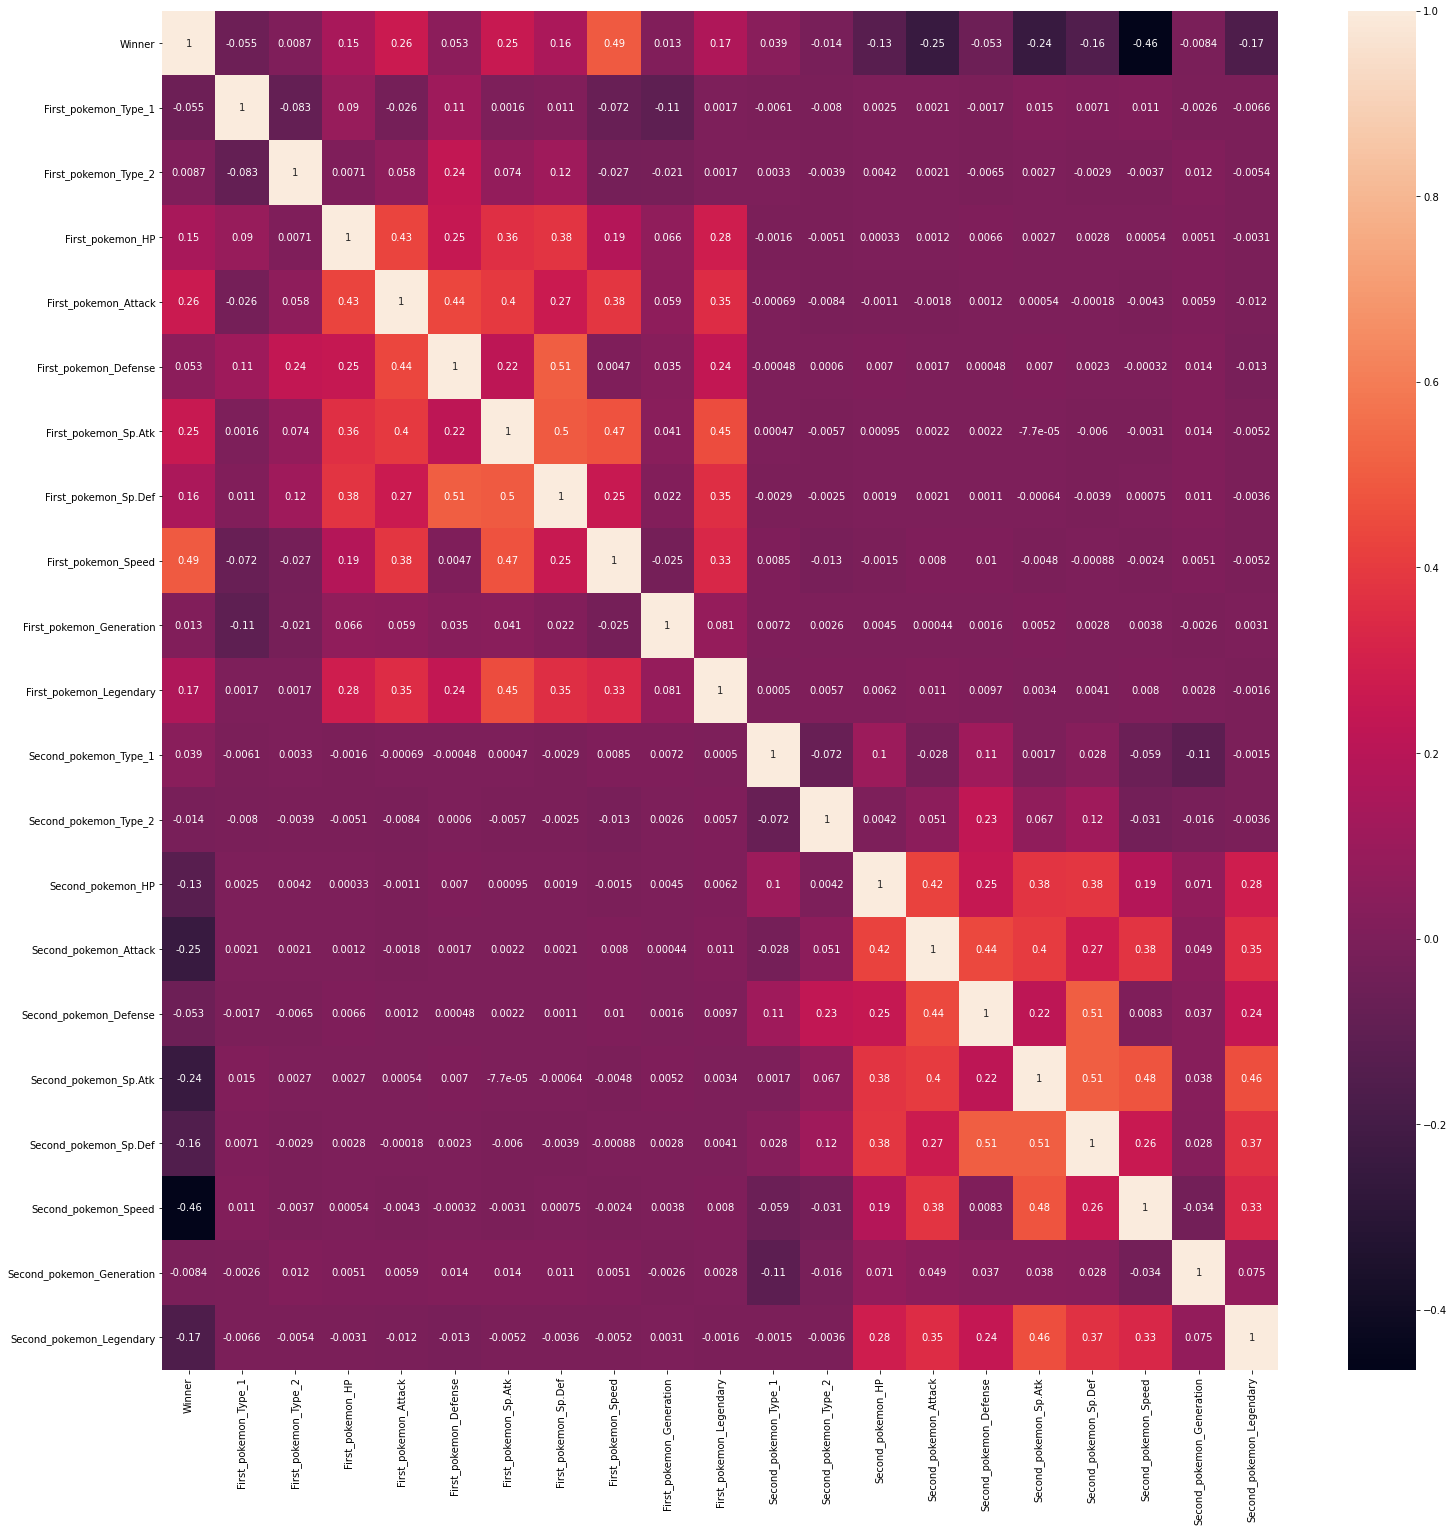

In [19]:
#visualizza una heatmap riguardo la correlazione tra le features
plt.figure(figsize=(25,25))
ax = sns.heatmap(merged.corr(), annot=True)

In [20]:
#dall'analisi della heatmap non si evidenzia una particolare feature predominante - se non la velocità del secondo pokemon.
#la correlazione è di -0.46 ovvero più è alta la velocità del secondo pokemon, più è alta la probabilità che questo vinca (ovvero che winner tende a 0).

#in effetti la vittoria non è data dal singolo pokemon ma dalla coppia di sfidanti
#si evidenzia il fatto che un pokemon leggendario ha qualche probabilità in più di vincere, ma niente di estremamente significativo

In [21]:
#una prima analisi è relativa ai tipi
#quello che voglio osservare è la seguente cosa

# tipo x    VS    tipo y 
# ==
# tipo y    VS    tipo x

#ovvero se in uno scontro tra due tipi, il primo pokemon è avvantaggiato oppure no

lista_tipi=merged.First_pokemon_Type_1.unique()
lista_tipi_coppie = [ (a,b) for a in lista_tipi for b in lista_tipi ]
lista_tipi_coppie=list(itertools.combinations(lista_tipi,2))

# è una lista di tuple con la seguente forma
#(tipo1, tipo2, nr. vittorie tipo1 per primo, nr. vittorie tipo2 per primo)
listafinal=[]
for (tipo1,tipo2) in lista_tipi_coppie:
    listafinal.append((tipo1, tipo2, merged[(merged.First_pokemon_Type_1 == tipo1) & (merged.Second_pokemon_Type_1 == tipo2) & (merged.Winner==1)].shape[0], merged[(merged.First_pokemon_Type_1 == tipo2) & (merged.Second_pokemon_Type_1 == tipo1) & (merged.Winner==1)].shape[0]))
        

# è una lista di interi (nr. vittorie tipo2 per primo - nr. vittorie tipo1 per primo)
final = list(map(lambda x: x[3]-x[2], listafinal))
statistics.stdev(final)


##si ottiene una deviazione standard rilevante

30.29253655436984

In [22]:
#una seconda analisi che voglio effettuare riguarda le statistiche dei pokemon
#l'idea è quella espressa in precedenza
#a meno che un pokemon non sia estremamente forte, l'esito di uno scontro è dato dalla coppia degli sfidanti

#aggiungo nuove feature - derivate - al dataframe.
merged['HP_difference']=merged['First_pokemon_HP']-merged['Second_pokemon_HP']
merged['Attack_difference']=merged['First_pokemon_Attack']-merged['Second_pokemon_Attack']
merged['Defense_difference']=merged['First_pokemon_Defense']-merged['Second_pokemon_Defense']
merged['SP.Atk_difference']=merged['First_pokemon_Sp.Atk']-merged['Second_pokemon_Sp.Atk']
merged['Sp.Def_difference']=merged['First_pokemon_Sp.Def']-merged['Second_pokemon_Sp.Def']
merged['Speed_difference']=merged['First_pokemon_Speed']-merged['Second_pokemon_Speed']

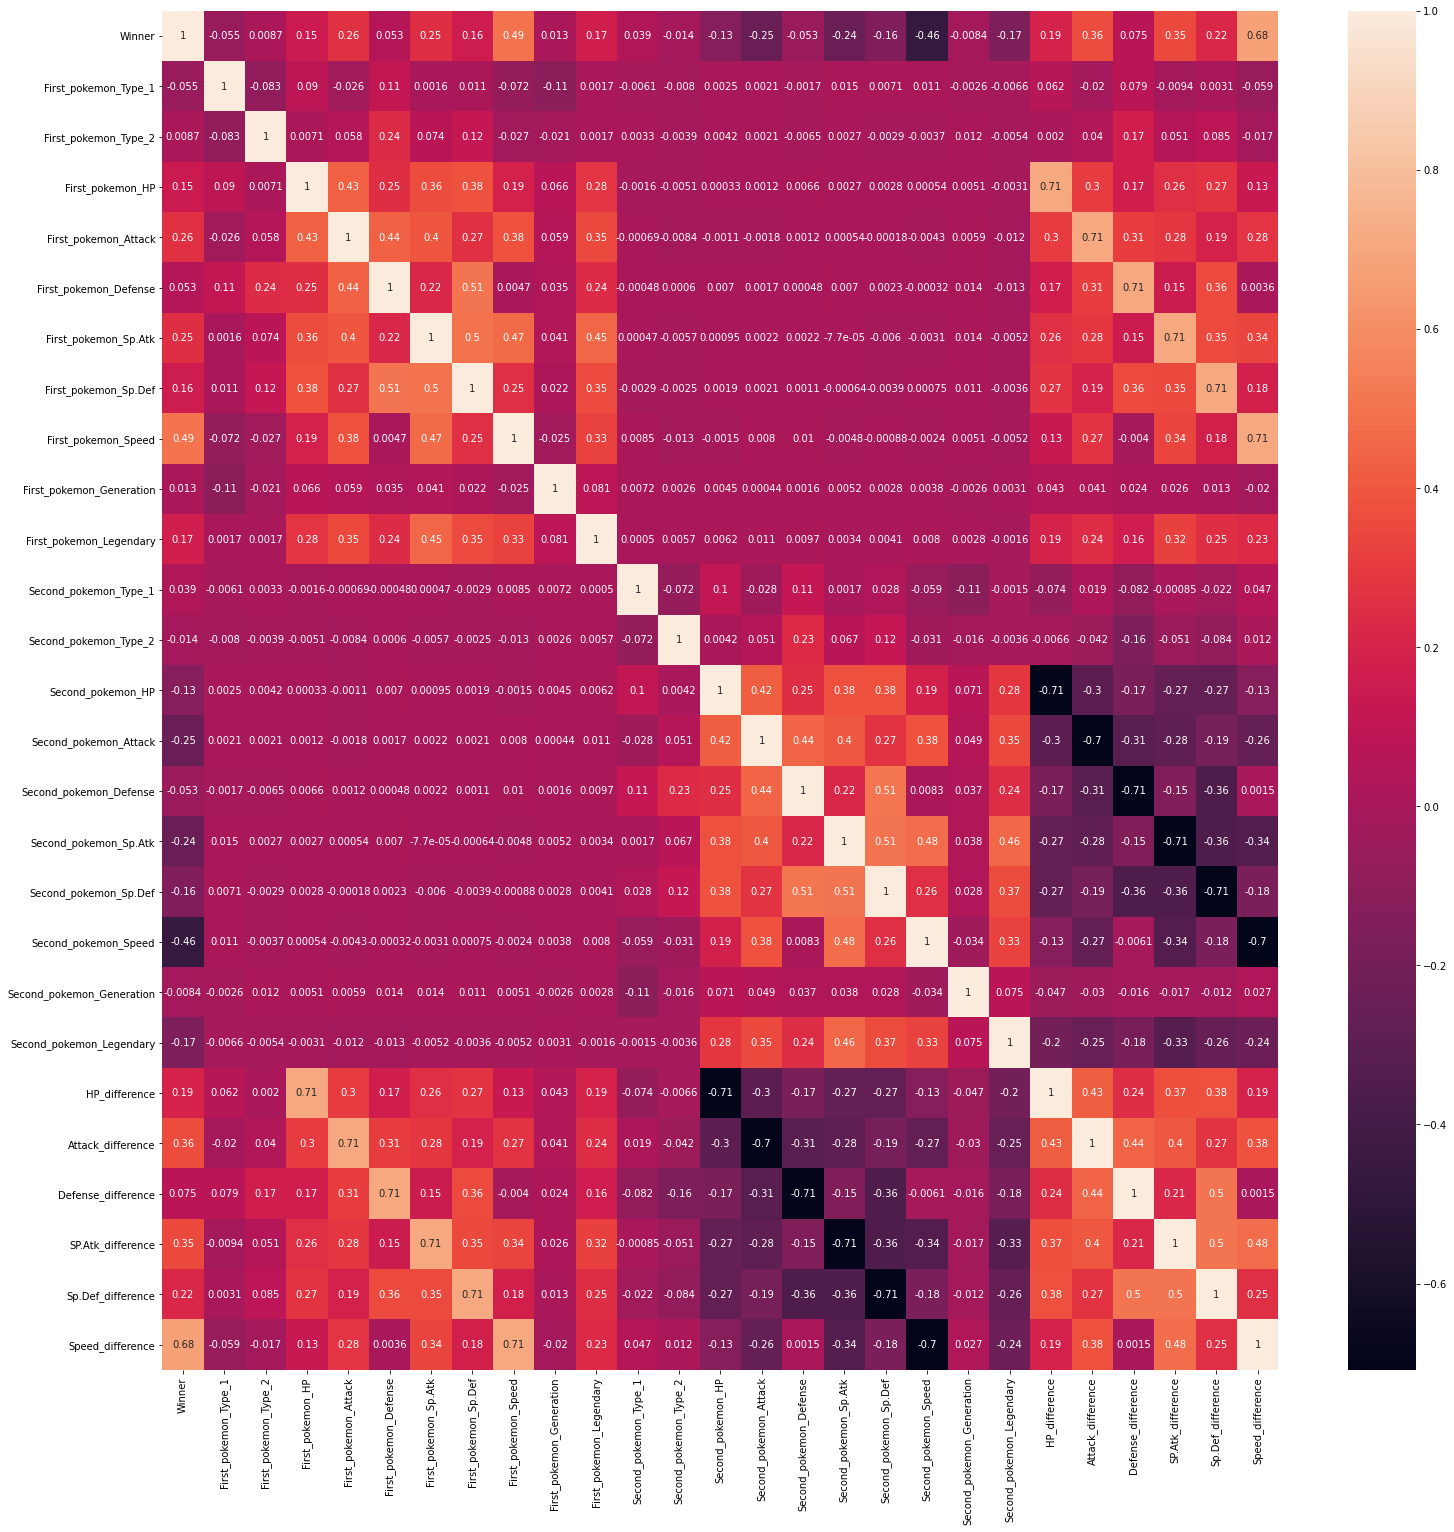

In [23]:
#visualizza nuovamente una heatmap riguardo la correlazione tra le features
plt.figure(figsize=(25,25))
ax = sns.heatmap(merged.corr(), annot=True)

In [24]:
#dall'analisi dell'heatmap posso eliminare altre feature
#si evidenzia nuovamente quanto la differenza di velocità sia un fattore importante per l'esito dello scontro
ulteri_colonneDaEliminare = ['Defense_difference', 'Second_pokemon_Generation','Second_pokemon_Defense','Second_pokemon_Type_2','Second_pokemon_Type_1','First_pokemon_Generation','First_pokemon_Defense','First_pokemon_Type_2','First_pokemon_Type_1']
merged = merged.drop(ulteri_colonneDaEliminare, axis=1)

## Preparazione al training

In [25]:
#il dataframe di test è reso omogeneo a quello di train
#queste operazioni possono essere effettuate anche in precedenza quando si lavora con il dataframe merged.
#ho posticipato le operazioni per rendere più leggibile l'analisi effettuata

merged_test = pd.merge(dataframe_test, dataframe_pokemon.rename(columns={'#':'First_pokemon'}), on='First_pokemon',  how='left')
merged_test = merged_test.rename(columns={'Name': 'First_pokemon_Name','Type 1': 'First_pokemon_Type_1', 'Type 2': 'First_pokemon_Type_2','HP': 'First_pokemon_HP', 'Attack': 'First_pokemon_Attack', 'Defense': 'First_pokemon_Defense', 'Sp. Atk': 'First_pokemon_Sp.Atk', 'Sp. Def': 'First_pokemon_Sp.Def', 'Speed': 'First_pokemon_Speed', 'Generation': 'First_pokemon_Generation', 'Legendary': 'First_pokemon_Legendary'})

merged_test = pd.merge(merged_test, dataframe_pokemon.rename(columns={'#':'Second_pokemon'}), on='Second_pokemon',  how='left')
merged_test = merged_test.rename(columns={'Name': 'Second_pokemon_Name','Type 1': 'Second_pokemon_Type_1', 'Type 2': 'Second_pokemon_Type_2','HP': 'Second_pokemon_HP', 'Attack': 'Second_pokemon_Attack', 'Defense': 'Second_pokemon_Defense', 'Sp. Atk': 'Second_pokemon_Sp.Atk', 'Sp. Def': 'Second_pokemon_Sp.Def', 'Speed': 'Second_pokemon_Speed', 'Generation': 'Second_pokemon_Generation', 'Legendary': 'Second_pokemon_Legendary'})

merged_test['Winner'] = merged_test.apply(updateValue, axis=1)

for feature in FeatureDaEffettuareEncoding:
    merged_test[feature] = le.fit_transform(merged_test[feature])

merged_test = merged_test.drop(colonneDaEliminare, axis=1)
merged_test = merged_test.apply(pd.to_numeric)

merged_test['HP_difference']=merged_test['First_pokemon_HP']-merged_test['Second_pokemon_HP']
merged_test['Attack_difference']=merged_test['First_pokemon_Attack']-merged_test['Second_pokemon_Attack']
merged_test['Defense_difference']=merged_test['First_pokemon_Defense']-merged_test['Second_pokemon_Defense']
merged_test['SP.Atk_difference']=merged_test['First_pokemon_Sp.Atk']-merged_test['Second_pokemon_Sp.Atk']
merged_test['Sp.Def_difference']=merged_test['First_pokemon_Sp.Def']-merged_test['Second_pokemon_Sp.Def']
merged_test['Speed_difference']=merged_test['First_pokemon_Speed']-merged_test['Second_pokemon_Speed']

merged_test = merged_test.drop(ulteri_colonneDaEliminare, axis=1)

In [26]:
#splitta i dati di train per avere feature (X_train) e target (y_train)
y_train = merged.pop('Winner')
X_train = merged

#splitta i dati di test per avere feature (X_test) e target (y_test)
y_test = merged_test.pop('Winner')
X_test = merged_test

## Training

Accuratezza: 92.59%


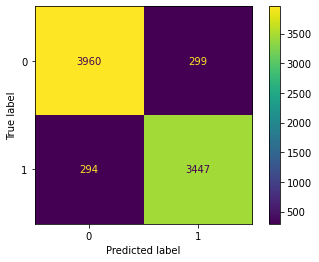

In [27]:
#effettua il train con un singolo albero di decisione

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test.values)
print("Accuratezza: {}%".format(round(clf.score(X_test.values,y_test.values)*100,2)))

plot_confusion_matrix(clf, X_test.values, y_test.values, display_labels=["0","1"])
plt.show()

Accuratezza: 88.81%


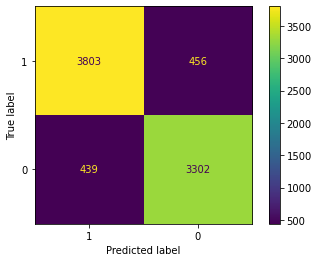

In [28]:
#effettua il train con la regressione lineare logistica

clf = LogisticRegression(max_iter=10000, C=1.0)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test.values)
print("Accuratezza: {}%".format(round(clf.score(X_test.values,y_test.values)*100,2)))

plot_confusion_matrix(clf, X_test.values, y_test.values, display_labels=["1","0"])
plt.show()

Accuratezza: 95.49%


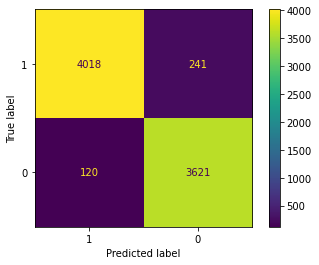

In [29]:
#effettua il train con una foresta di alberi di decisione

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test.values)
print("Accuratezza: {}%".format(round(clf.score(X_test.values,y_test.values)*100,2)))

plot_confusion_matrix(clf, X_test.values, y_test.values, display_labels=["1","0"])
plt.show()